<a href="https://colab.research.google.com/github/Sushmitha-Katti/EVA-4/blob/master/Session8/FinalS8Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/Template/S7'
sys.path.append(folder)


In [0]:
%matplotlib inline
import torch
import train_test_loader
import show_images
import model
import train_test
import evaluate

In [6]:
classes, trainloader, testloader = train_test_loader.load()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([128, 3, 32, 32])


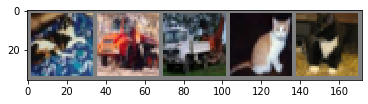

In [7]:
show_images.show_random_images(trainloader, classes)

In [4]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9,weight_decay=0.0005)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

In [10]:
testLoss = []
testAcc = []
EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
    train_test.train(model, device, trainloader, optimizer, criterion, epoch)
    scheduler.step()
    test_loss , test_acc = train_test.test(model, device, criterion, testloader)
    testLoss.append(test_loss)
    testAcc.append(test_acc)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.1


Loss=1.0779361724853516 Batch_id=390 Accuracy=52.70: 100%|██████████| 391/391 [00:30<00:00, 13.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 5355/10000 (53.55%)

EPOCH: 2 LR: 0.1


Loss=0.9933737516403198 Batch_id=390 Accuracy=60.19: 100%|██████████| 391/391 [00:30<00:00, 13.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 6284/10000 (62.84%)

EPOCH: 3 LR: 0.1


Loss=1.184377670288086 Batch_id=390 Accuracy=65.92: 100%|██████████| 391/391 [00:30<00:00, 13.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 6695/10000 (66.95%)

EPOCH: 4 LR: 0.1


Loss=0.9270011186599731 Batch_id=390 Accuracy=69.75: 100%|██████████| 391/391 [00:30<00:00, 13.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6760/10000 (67.60%)

EPOCH: 5 LR: 0.1


Loss=0.753186821937561 Batch_id=390 Accuracy=72.87: 100%|██████████| 391/391 [00:30<00:00, 13.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 6375/10000 (63.75%)

EPOCH: 6 LR: 0.1


Loss=0.5526013374328613 Batch_id=390 Accuracy=75.55: 100%|██████████| 391/391 [00:30<00:00, 13.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7497/10000 (74.97%)

EPOCH: 7 LR: 0.1


Loss=0.5269275903701782 Batch_id=390 Accuracy=77.70: 100%|██████████| 391/391 [00:30<00:00, 13.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7235/10000 (72.35%)

EPOCH: 8 LR: 0.1


Loss=0.7295790910720825 Batch_id=390 Accuracy=78.43: 100%|██████████| 391/391 [00:31<00:00, 13.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7160/10000 (71.60%)

EPOCH: 9 LR: 0.1


Loss=0.6090092658996582 Batch_id=390 Accuracy=79.69: 100%|██████████| 391/391 [00:30<00:00, 13.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7699/10000 (76.99%)

EPOCH: 10 LR: 0.1


Loss=0.5282109379768372 Batch_id=390 Accuracy=80.26: 100%|██████████| 391/391 [00:30<00:00, 13.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7468/10000 (74.68%)

EPOCH: 11 LR: 0.1


Loss=0.7813717126846313 Batch_id=390 Accuracy=80.98: 100%|██████████| 391/391 [00:30<00:00, 13.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7871/10000 (78.71%)

EPOCH: 12 LR: 0.1


Loss=0.5355125665664673 Batch_id=390 Accuracy=81.47: 100%|██████████| 391/391 [00:30<00:00, 13.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7388/10000 (73.88%)

EPOCH: 13 LR: 0.1


Loss=0.49233660101890564 Batch_id=390 Accuracy=81.88: 100%|██████████| 391/391 [00:30<00:00, 13.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7659/10000 (76.59%)

EPOCH: 14 LR: 0.010000000000000002


Loss=0.4094231128692627 Batch_id=390 Accuracy=87.94: 100%|██████████| 391/391 [00:30<00:00, 13.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8621/10000 (86.21%)

EPOCH: 15 LR: 0.010000000000000002


Loss=0.2159239947795868 Batch_id=390 Accuracy=89.82: 100%|██████████| 391/391 [00:31<00:00, 13.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8677/10000 (86.77%)

EPOCH: 16 LR: 0.010000000000000002


Loss=0.21013431251049042 Batch_id=390 Accuracy=90.53: 100%|██████████| 391/391 [00:30<00:00, 13.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8722/10000 (87.22%)

EPOCH: 17 LR: 0.010000000000000002


Loss=0.22799189388751984 Batch_id=390 Accuracy=90.96: 100%|██████████| 391/391 [00:30<00:00, 13.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8732/10000 (87.32%)

EPOCH: 18 LR: 0.010000000000000002


Loss=0.34018903970718384 Batch_id=390 Accuracy=91.67: 100%|██████████| 391/391 [00:30<00:00, 13.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8719/10000 (87.19%)

EPOCH: 19 LR: 0.010000000000000002


Loss=0.20988626778125763 Batch_id=390 Accuracy=91.97: 100%|██████████| 391/391 [00:30<00:00, 13.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8759/10000 (87.59%)

EPOCH: 20 LR: 0.010000000000000002


Loss=0.21201081573963165 Batch_id=390 Accuracy=92.43: 100%|██████████| 391/391 [00:30<00:00, 13.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8784/10000 (87.84%)

EPOCH: 21 LR: 0.010000000000000002


Loss=0.13638082146644592 Batch_id=390 Accuracy=93.04: 100%|██████████| 391/391 [00:30<00:00, 13.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8762/10000 (87.62%)

EPOCH: 22 LR: 0.010000000000000002


Loss=0.1505100429058075 Batch_id=390 Accuracy=93.34: 100%|██████████| 391/391 [00:30<00:00, 13.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8748/10000 (87.48%)

EPOCH: 23 LR: 0.010000000000000002


Loss=0.16248366236686707 Batch_id=390 Accuracy=93.49: 100%|██████████| 391/391 [00:30<00:00, 12.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8759/10000 (87.59%)

EPOCH: 24 LR: 0.010000000000000002


Loss=0.2983519732952118 Batch_id=390 Accuracy=93.90: 100%|██████████| 391/391 [00:30<00:00, 13.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8759/10000 (87.59%)

EPOCH: 25 LR: 0.010000000000000002


Loss=0.12130153179168701 Batch_id=390 Accuracy=94.13: 100%|██████████| 391/391 [00:30<00:00, 13.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8747/10000 (87.47%)

EPOCH: 26 LR: 0.010000000000000002


Loss=0.22082316875457764 Batch_id=390 Accuracy=94.32: 100%|██████████| 391/391 [00:31<00:00, 13.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8725/10000 (87.25%)

EPOCH: 27 LR: 0.010000000000000002


Loss=0.13641849160194397 Batch_id=390 Accuracy=94.56: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8698/10000 (86.98%)

EPOCH: 28 LR: 0.010000000000000002


Loss=0.15305045247077942 Batch_id=390 Accuracy=94.79: 100%|██████████| 391/391 [00:30<00:00, 13.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8721/10000 (87.21%)

EPOCH: 29 LR: 0.0010000000000000002


Loss=0.042709529399871826 Batch_id=390 Accuracy=96.06: 100%|██████████| 391/391 [00:30<00:00, 13.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8896/10000 (88.96%)

EPOCH: 30 LR: 0.0010000000000000002


Loss=0.2442961186170578 Batch_id=390 Accuracy=96.63: 100%|██████████| 391/391 [00:30<00:00, 13.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8907/10000 (89.07%)

EPOCH: 31 LR: 0.0010000000000000002


Loss=0.06436435133218765 Batch_id=390 Accuracy=96.80: 100%|██████████| 391/391 [00:30<00:00, 13.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8897/10000 (88.97%)

EPOCH: 32 LR: 0.0010000000000000002


Loss=0.07882402092218399 Batch_id=390 Accuracy=96.98: 100%|██████████| 391/391 [00:30<00:00, 13.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8863/10000 (88.63%)

EPOCH: 33 LR: 0.0010000000000000002


Loss=0.15388359129428864 Batch_id=390 Accuracy=97.19: 100%|██████████| 391/391 [00:30<00:00, 13.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8898/10000 (88.98%)

EPOCH: 34 LR: 0.0010000000000000002


Loss=0.13371384143829346 Batch_id=390 Accuracy=97.27: 100%|██████████| 391/391 [00:30<00:00, 13.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8885/10000 (88.85%)

EPOCH: 35 LR: 0.0010000000000000002


Loss=0.07348458468914032 Batch_id=390 Accuracy=97.27: 100%|██████████| 391/391 [00:30<00:00, 13.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8875/10000 (88.75%)

EPOCH: 36 LR: 0.0010000000000000002


Loss=0.06529780477285385 Batch_id=390 Accuracy=97.31: 100%|██████████| 391/391 [00:30<00:00, 13.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8884/10000 (88.84%)

EPOCH: 37 LR: 0.0010000000000000002


Loss=0.05964925140142441 Batch_id=390 Accuracy=97.63: 100%|██████████| 391/391 [00:30<00:00, 13.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8878/10000 (88.78%)

EPOCH: 38 LR: 0.0010000000000000002


Loss=0.11466597020626068 Batch_id=390 Accuracy=97.67: 100%|██████████| 391/391 [00:30<00:00, 13.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8917/10000 (89.17%)

EPOCH: 39 LR: 0.0010000000000000002


Loss=0.05109458416700363 Batch_id=390 Accuracy=97.61: 100%|██████████| 391/391 [00:30<00:00, 13.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8895/10000 (88.95%)

EPOCH: 40 LR: 0.0010000000000000002


Loss=0.1466173231601715 Batch_id=390 Accuracy=97.74: 100%|██████████| 391/391 [00:30<00:00, 13.67it/s]



Test set: Average loss: 0.0029, Accuracy: 8902/10000 (89.02%)



GroundTruth:  horse  ship  bird   cat horse
Predicted:  horse  ship  bird   cat horse


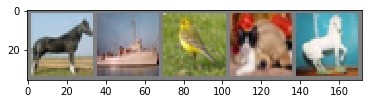

In [11]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [12]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 89 %


In [13]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 86 %
Accuracy of   car : 100 %
Accuracy of  bird : 96 %
Accuracy of   cat : 76 %
Accuracy of  deer : 94 %
Accuracy of   dog : 80 %
Accuracy of  frog : 94 %
Accuracy of horse : 90 %
Accuracy of  ship : 94 %
Accuracy of truck : 89 %


Text(0.5, 1.0, 'Test Accuracy')

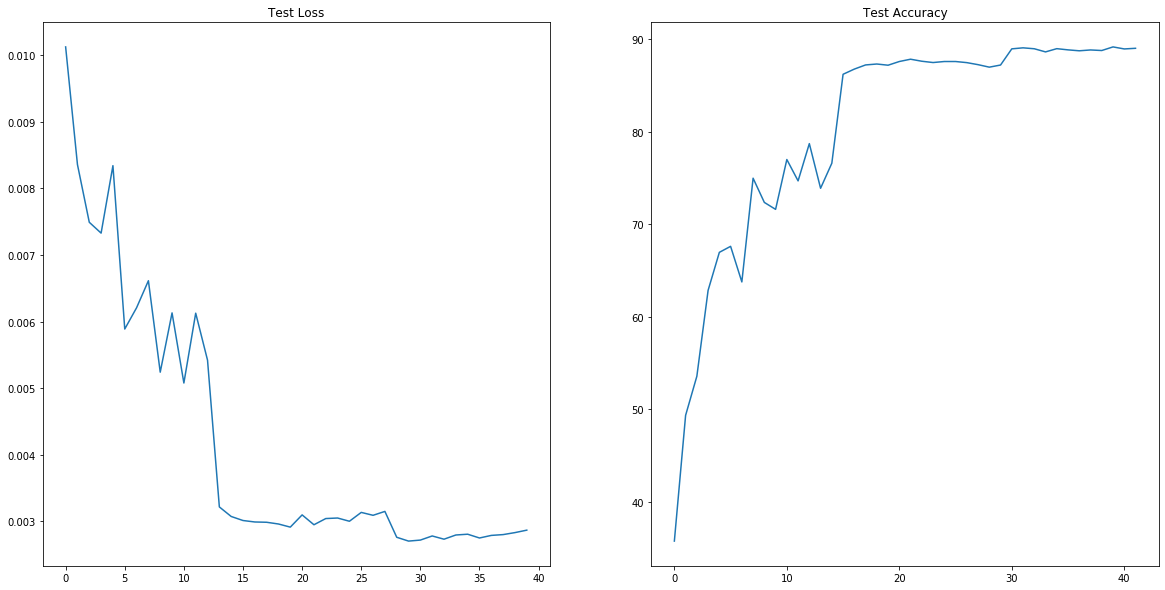

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20,10))

axs[0].plot(testLoss)
axs[0].set_title("Test Loss")


axs[1].plot(testAcc[39])
axs[1].set_title("Test Accuracy")

